# GDP and Life Expenctancy: How a Countries Economy can Effect the Populations Longevity

## Introduction

Gross domestic profit, or GDP, is the universal standard for measuring a countries market value based on all the final goods and services produced in said country, and sold in a specific time period. In this analysis we are going to explore how GDP is related to average life expectancy at birth in different countries, throughout the years. We will be exploring a dataset that will help us answer questions such as:

* Has life expectancy increased over time in the six countries?
* Has GDP increased over time in the six countries?
* Is there a correlation between GDP and life expectancy of a country?
* What is the average life expectancy in these nations?
* What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Preparing the data

In [94]:
# Load in necessary packages
import pandas as pd
import seaborn as sns
from matplotlib.axis import Axis
import matplotlib.pyplot as plt
import numpy as np

Below we can see a small section of our data that gives us an idea of it's layout and structure. It includes four columns:

* ```Country```
* ```Year```
* ```Life exoectancy at birth (years)```
* ```GDP```

In [6]:
# Reading the data and saving it to a dataframe
all_data = pd.read_csv(r"\all_data.csv")

# Inspecting the data
all_data.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


Since ```Life expectancy at birth (years)``` is a mouthful, and we don't want to type it everytime, we will change the columns name to something more user and reader friendly. How about ```Life_Expectancy```.

In [179]:
all_data.rename(columns={'Life expectancy at birth (years)': 'Life_Expectancy'}, inplace=True)

# Check column names
all_data.columns

Index(['Country', 'Year', 'Life_Expectancy', 'GDP'], dtype='object')

## Summary statistics

Now that we have a good idea of what our data looks like, and the kind of information it stores, we can begin running summary statistics. Below is a list of the methods we will use to explore this data.


* ```np.size(dataframe, 0)``` to understand how large our dataset is (number of rows).
* ```dataframe['Country'].unique()``` to get number of unique countries.
* ```dataframe['Year'].unique()``` to get our range of years.
* ```dataframe.info()``` to get info on columns and their respective data-types.
* ```dataframe.describe(include="all")``` for statistical summaries for numerical data.

In [10]:
print("Number of rows in all_data is: ", np.size(all_data, 0))
print("Number of countries inluded: ", len(all_data['Country'].unique()))
print("Number of years: ", len(all_data['Year'].unique()))
print("Countries: ", all_data['Country'].unique())
print("Years: ", all_data['Year'].unique())

Number of rows in all_data is:  96
Number of countries inluded:  6
Number of years:  16
Countries:  ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Years:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


* Here we can see that this is a relatively small dataset, at 96 rows in length, and consisting of 6 countries over a period of 16 years from 2000 to 2015.

In [14]:
# Info on null-counts and data types (dtypes)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


* We can see that none of the columns have any null values since each has 96 non-null values, and as we learned before the dataframe is 96 rows long. We can also see that each column appears to have the approproate associated data type (dtype).

In [27]:
# Numerical statistic information
all_data.describe()

,Year,Life_Expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


* We can see that the average life expectancy is around 72.8 years while the shortest is a mere 44.3 and the longest is 81 years.
* The average GDP is 3.880499e+12, or 3.8 trillion US dollars. The minimum is 441.6 million US dollars, while the largest GDP is 18.1 trillion US dollars.

This chart is useful, but we want to take a look at these averages broken down by country. Below, we can see that Zimbabwe has a much lower average life expectancy at around 50, while the rest of the countries have an average life expectancy of around 74 to 79. 

In [178]:
Country_Means = all_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
Country_Means

,Country,Life_Expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


## Analysis and visualization

We can get a better understanding of these statistics by visualizing the data.

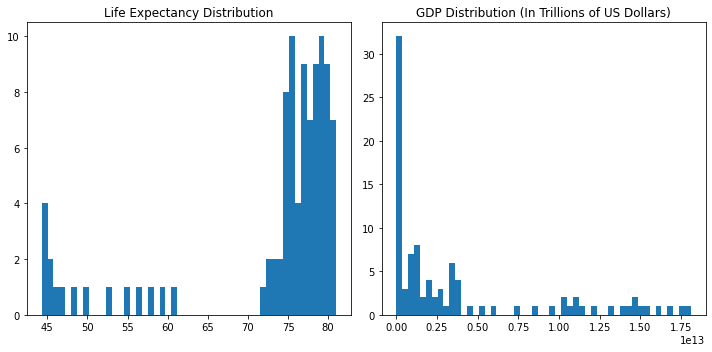

In [172]:
# Create figure size
plt.figure(figsize=(10,5))

# Plot life expectancy histogram
plt.subplot(1, 2, 1)
plt.hist(all_data.Life_Expectancy, bins=50)
plt.title("Life Expectancy Distribution")

# Plot GDP histogram
plt.subplot(1, 2, 2)
plt.hist(all_data.GDP, bins=50)
plt.title("GDP Distribution (In Trillions of US Dollars)")

plt.tight_layout()
plt.show()

We see a big spike on the right side for life expectancy. This shows us that the average life expectancy falls somewhere in between 71 and 81, which is inline with what we saw earlier by using ```all_data.describe```. GDP distribution has a long right tail with a massive spike on the left. There appears to be a large number of occurances on the very low end of GDP distribution. Why is that? Another way to look at this data is with a boxplot.

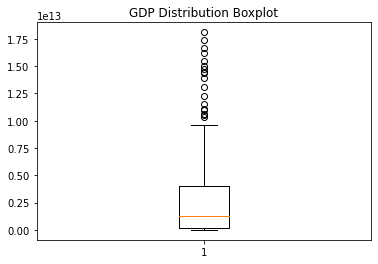

In [168]:
plt.boxplot(all_data.GDP)
plt.title("GDP Distribution Boxplot")
plt.show()

This shows us that there are many outliers that are well above the average GDP. So what can we learn by looking at how GDP and life expectancy change over time?

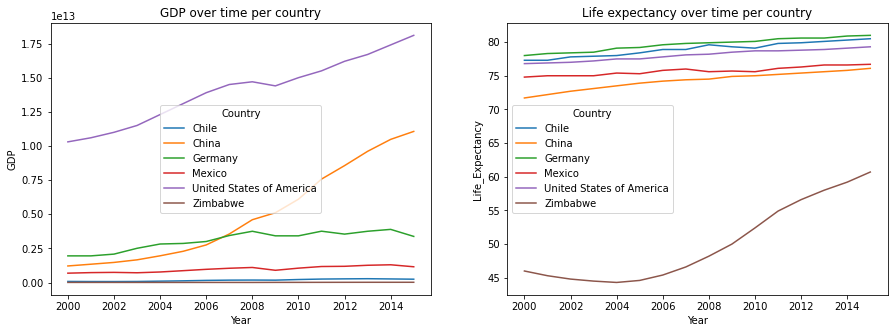

In [92]:
# Create figure size
plt.figure(figsize=(15,5))

# Plot life expectancy vs Year line plot
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', hue='Country', data=all_data)
plt.title('GDP over time per country')

# Plot GDP vs Year line plot
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Life_Expectancy', hue='Country', data=all_data)
plt.title('Life expectancy over time per country')

plt.show()

Interestingly, we get two different kinds of outliers form these charts. On the chart titled 'GDP over time per country', we can see that the USA has a GDP far above the other countries in our data. We can also observe that since 2008, China's GDP saw a lot of growth, leading to its own GDP being an above most others by 2015. 

On the otherhand, in the chart titled 'Life expectancy over time per country', we can observe that Zimbabwe is far below the others, however it appears to have the most growth.

Since all of the countries on these charts share a y-axis, it can be hard to distinguish the smaller details. In the charts below, we get a better idea of the positive growth of GDP over time per counry. It is worth noting that Chile and Mexico experience a dip in GDP around the same time, near 2010. Why is that? Maybe we can learn more with later charts.

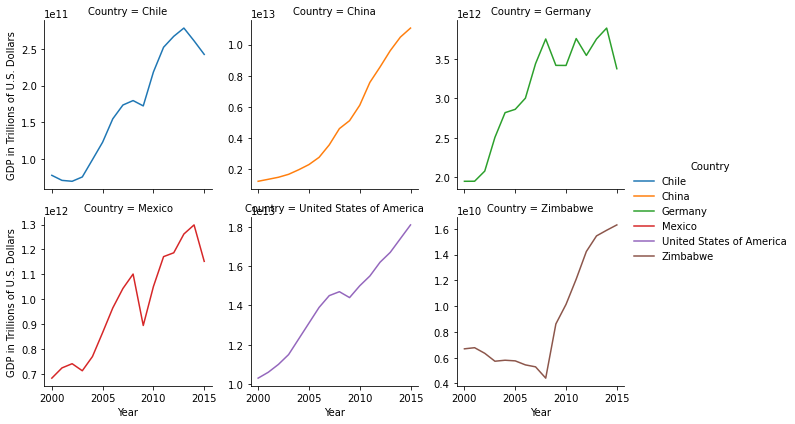

In [173]:
graphGDP = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

In the charts below, we will see that the same is true for life expectancy. The countries overall seem to exhibit a positive trend in life expectancy over time. Chile and Mexico both seem to show another dip around 2010. Based on our previous observasion, we conclude that it could be related to the dip in GDP around the same time.  

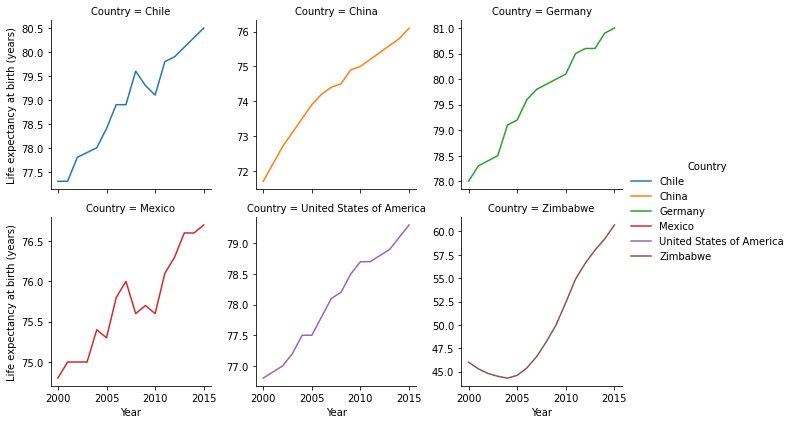

In [175]:
graphLife_Expectancy = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLife_Expectancy = (graphLife_Expectancy.map(sns.lineplot,"Year","Life_Expectancy")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLife_Expectancy;

The next charts will explore the relationship between ```GDP``` and ```Life_Expectancy```. Like the previous plots, we will be looking at this relationship for each individual country. Most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though we can see an increase in GDP and life expectancy, showing a positive correlation.

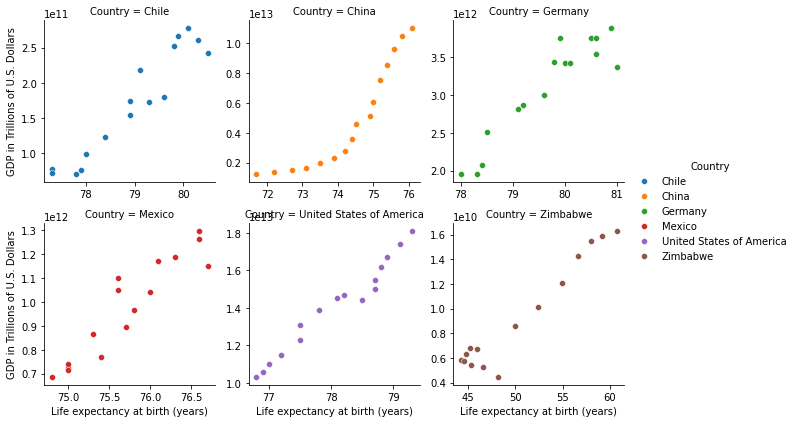

In [176]:
graph = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life_Expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


## Conclusion

Based on our data, we can say that there is a definitive correlation between a countries GDP and the average life expectancy of someone living there. As GDP is growing, it is often a sign that the economy is doing well. Employment is likely to be increasing and the average quality of life as well as people will have more money in their pockets. 

How has this project helped us answer our questions in the introduction?

**Has life expectancy increased over time in the six countries?**

* Yes, the data shows that every country saw increased life expectancy almost every year. Although Zimbabwe had the lowest life expectancy, it also showed the most growth over time.

**Has GDP increased over time in the six countries?**

* Yes, we learned that every country saw a rise in GDP. China saw rapid economic growth during this time.

**Is there a correlation between GDP and life expectancy of a country?**

* As mentioned above, as GDP increases, the data shows that life expectancy is very likley to as well.

**What is the average life expectancy in these nations?**

* The average life expectancy overall is 72.8 years. 
* Broken down by country, the average life expectancy is: Chile: 79, China: 74, Germany: 80, Mexico: 76, USA: 78, Zimbabwe: 50

**What is the distribution of that life expectancy?**

* As we saw in the chart above, almost all of the countries are on the right side of the graph, at around 70-80 years for life expectancy. The exception is Zimbabwe, which sits to the far left side of the graph, at the lower end of life expectancy.